In [1]:
#importing basic python libraries
import missingno as mn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [2]:
# import xgboost

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [3]:
# data source url - 2nd topic - classification problem - Happy customer Bank

url = "https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv"

In [4]:
# data load, need for encoding
df = pd.read_csv(url, delimiter=",", encoding='ISO-8859–1')
print(df.shape)

(87020, 26)


In [5]:
# check if dataframe
type(df)

pandas.core.frame.DataFrame

In [6]:
# option set to have on overview of each column - withoot this option not all columns are visible
pd.set_option('display.max_columns', 0)
df.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,920000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,500000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [7]:
df.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn,Disbursed
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,87020.000000,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,4.961503,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,2.949805,0.029350,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,5.670385,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,1.697720,0.168785,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,0.000000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,1.000000,0.000000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,2.000000,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,3.000000,0.000000,0.000000
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,11.000000,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,5.000000,0.000000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,7.000000,1.000000,1.000000




# Input variables:



| Attribute | Definition   |
|:------|:------|
|   **ID**  | Unique ID (can not be used for predictions) - will be removed|
|   **Gender**  | Sex|
|   **City**  | Current City|
|   **Monthly_Income**  | Monthly Income in rupees|
|   **DOB**  | Date of Birth|
|   **Lead_Creation_Date**  | Lead Created on date|
|   **Loan_Amount_Applied**  | Loan Amount Requested (INR)|
|   **Loan_Tenure_Applied**  | Loan Tenure Requested (in years)|
|   **Existing_EMI**  | EMI of Existing Loans (INR)|
|   **Employer_Name**  | Employer Name|
|   **Salary_Account** | Salary account with Bank|
| **Mobile_Verified**|Mobile Verified (Y/N)
| **Var5** | Continuous classified variable
| **Loan_Amount_Submitted** | Loan Amount Revised and Selected after seeing Eligibility
| **Loan_Tenure_Submitted** | Loan Tenure Revised and Selected after seeing Eligibility (Years)
| **Interest_Rate** | Interest Rate of Submitted Loan Amount
| **Processing_Fee** | Processing Fee of Submitted Loan Amount (INR)
| **EMI_Loan_Submitted** | EMI of Submitted Loan Amount (INR)
| **Filled_Form** | Filled Application form post quote
| **Device_Type** | Device from which application was made (Browser/ Mobile)
| **Var2** | Categorical Variable with multiple Levels
| **Source**| Categorical Variable with multiple Levels
| **Var4** | Categorical Variable with multiple Levels

# Outcomes:



| Attribute | Definition  |
|:------|:------|
|   **LoggedIn**  | Application Logged (Variable for understanding the problem – cannot be used in prediction)|
|   **Disbursed**  | **Loan Disbursed (Target Variable)**|

### At the beginning we have remove LoggedIn and ID attributes

In [8]:
# we remove LoggedIn and ID columns from the dataset - as required

df = df.drop(['LoggedIn', 'ID'], 1)

In [9]:
print(df.shape)

(87020, 24)


In [10]:
#check - count how many null values we have

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
Disbursed                    0
dtype: int64


In [11]:
#check - count how many null values we have

for i in range(df.shape[1]):
    column = df.columns.values[i]
    n_miss = df.isnull().sum()[i]
    perc = n_miss / df.shape[0] * 100
    print('> %d, %s, Missing: %d (%.1f%%)' % (i, column, n_miss, perc))

> 0, Gender, Missing: 0 (0.0%)
> 1, City, Missing: 1003 (1.2%)
> 2, Monthly_Income, Missing: 0 (0.0%)
> 3, DOB, Missing: 0 (0.0%)
> 4, Lead_Creation_Date, Missing: 0 (0.0%)
> 5, Loan_Amount_Applied, Missing: 71 (0.1%)
> 6, Loan_Tenure_Applied, Missing: 71 (0.1%)
> 7, Existing_EMI, Missing: 71 (0.1%)
> 8, Employer_Name, Missing: 71 (0.1%)
> 9, Salary_Account, Missing: 11764 (13.5%)
> 10, Mobile_Verified, Missing: 0 (0.0%)
> 11, Var5, Missing: 0 (0.0%)
> 12, Var1, Missing: 0 (0.0%)
> 13, Loan_Amount_Submitted, Missing: 34613 (39.8%)
> 14, Loan_Tenure_Submitted, Missing: 34613 (39.8%)
> 15, Interest_Rate, Missing: 59294 (68.1%)
> 16, Processing_Fee, Missing: 59600 (68.5%)
> 17, EMI_Loan_Submitted, Missing: 59294 (68.1%)
> 18, Filled_Form, Missing: 0 (0.0%)
> 19, Device_Type, Missing: 0 (0.0%)
> 20, Var2, Missing: 0 (0.0%)
> 21, Source, Missing: 0 (0.0%)
> 22, Var4, Missing: 0 (0.0%)
> 23, Disbursed, Missing: 0 (0.0%)


In [12]:
sns.set()

<AxesSubplot:>

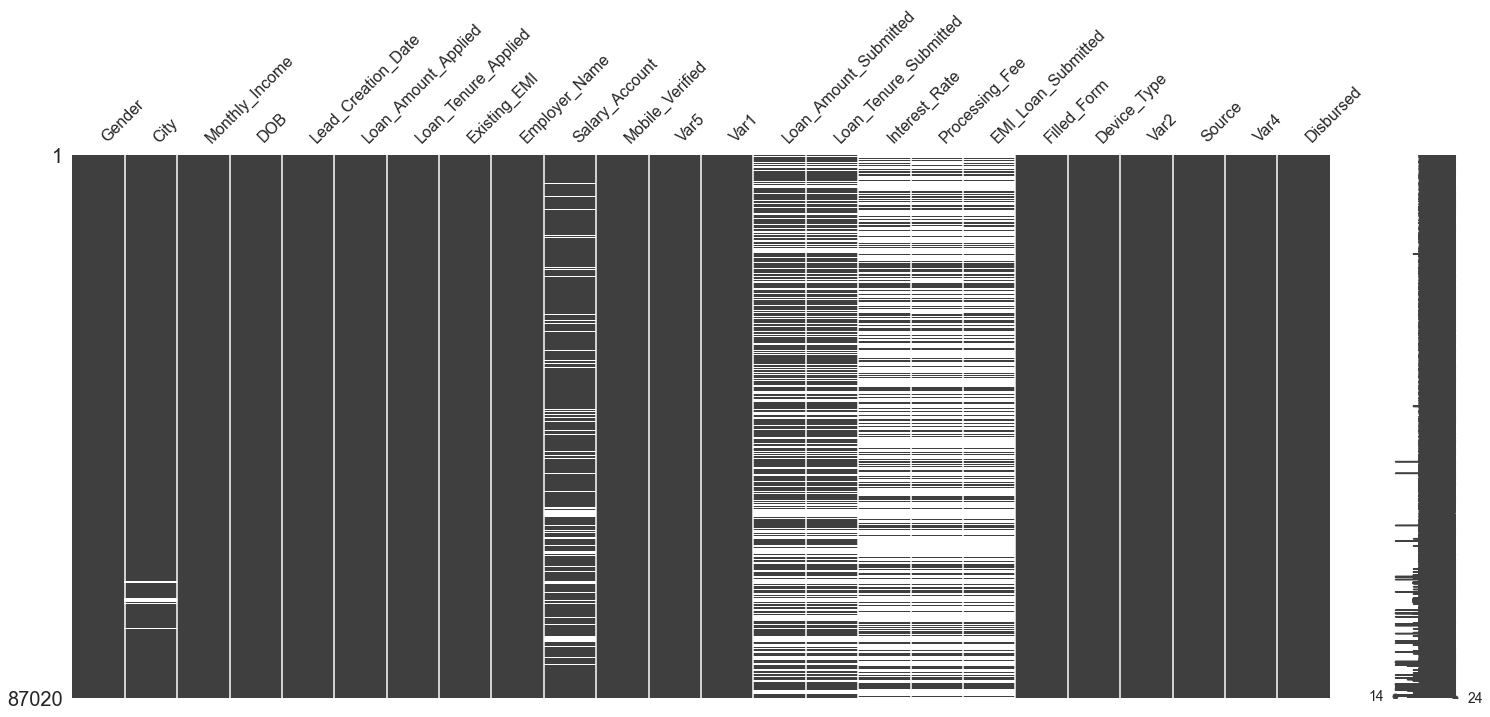

In [13]:
# summary of missing values per attribute
mn.matrix(df)

<AxesSubplot:>

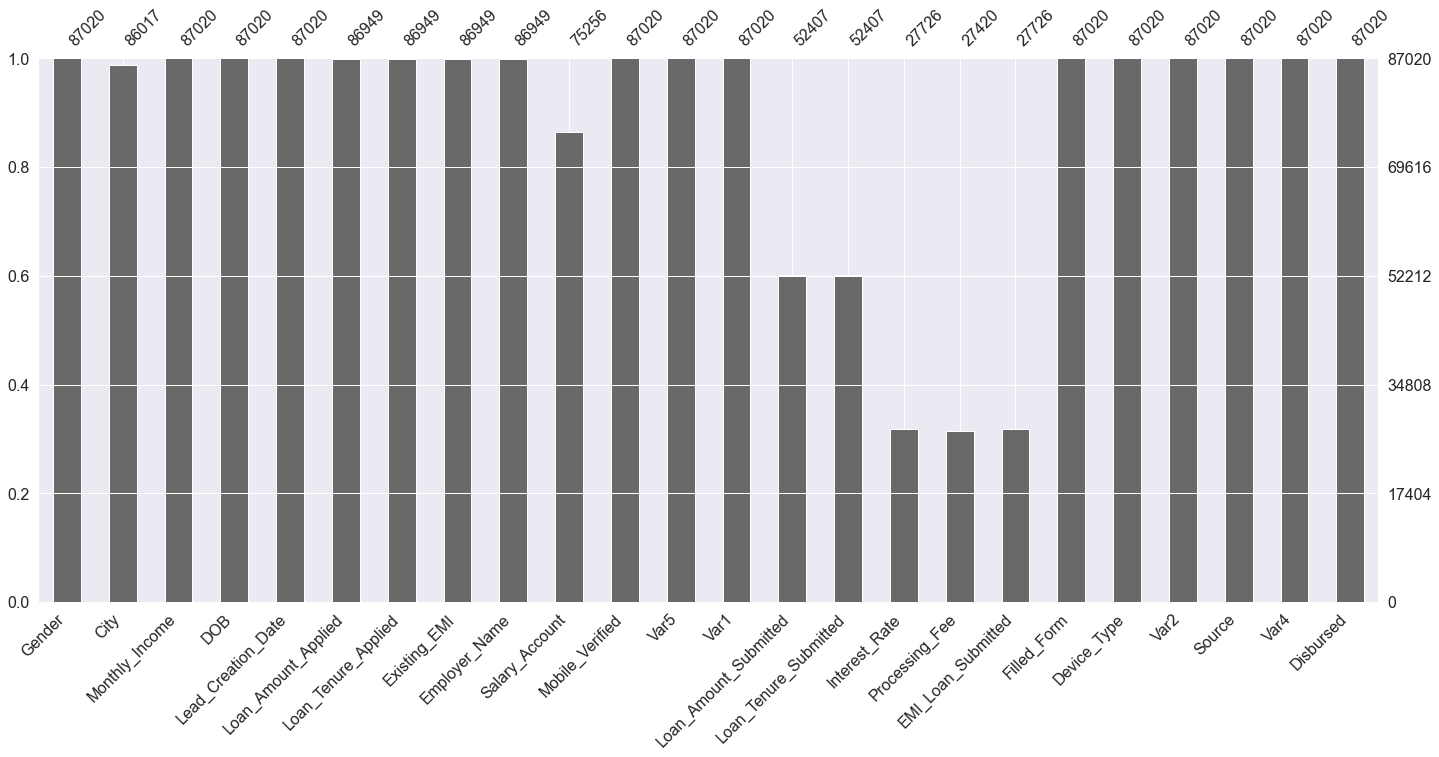

In [14]:
# summary of missing values per attribute
mn.bar(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  object 
 1   City                   86017 non-null  object 
 2   Monthly_Income         87020 non-null  int64  
 3   DOB                    87020 non-null  object 
 4   Lead_Creation_Date     87020 non-null  object 
 5   Loan_Amount_Applied    86949 non-null  float64
 6   Loan_Tenure_Applied    86949 non-null  float64
 7   Existing_EMI           86949 non-null  float64
 8   Employer_Name          86949 non-null  object 
 9   Salary_Account         75256 non-null  object 
 10  Mobile_Verified        87020 non-null  object 
 11  Var5                   87020 non-null  int64  
 12  Var1                   87020 non-null  object 
 13  Loan_Amount_Submitted  52407 non-null  float64
 14  Loan_Tenure_Submitted  52407 non-null  float64
 15  In

In [16]:
#overview of lowest and largest values in the dataset

pd.set_option('display.max_columns', 0)
df.agg(['min', 'max', 'mean', 'std'])

,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
min,Female,0.000000e+00,01-Apr-57,01-Jul-15,0.000000e+00,0.000000,0.000000e+00,N,0.000000,HAVC,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,N,Mobile,A,S122,0.000000,0.000000
max,Male,4.445544e+08,31-Oct-97,31-May-15,1.000000e+07,10.000000,1.000000e+07,Y,18.000000,HVYS,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,Y,Web-browser,G,S162,7.000000,1.000000
mean,NaN,5.884997e+04,NaN,NaN,2.302507e+05,2.131399,3.696228e+03,NaN,4.961503,NaN,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,NaN,NaN,NaN,NaN,2.949805,0.014629
std,NaN,2.177511e+06,NaN,NaN,3.542068e+05,2.014193,3.981021e+04,NaN,5.670385,NaN,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,NaN,NaN,NaN,NaN,1.697720,0.120062


### Date columns adjustments

In [17]:
#fixing dates - handling issue with parsing wrong century - anything with the %y year below 69 will be attributed a century of 2000, and 69 upwards get 1900

import datetime
def fix_date(x):
    if x.year > 1999:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)


df['DOB'] = df['DOB'].astype('datetime64[ns]').apply(fix_date)
df['Year_OB'] = df['DOB'].apply(lambda x: x.strftime('%Y'))
df = df.drop('DOB', 1)
df['Year_OB'] = df['Year_OB'].astype('datetime64[ns]').apply(lambda x: x.toordinal())  
df['Lead_Creation_Date'] = df['Lead_Creation_Date'].astype('datetime64[ns]').apply(lambda x: x.toordinal())  



In [18]:
# After adjustmetns we receive only 61 unique values
len(df['Year_OB'].unique())

61

In [19]:
#There are no missing values for Year_OB column

### City column adjustments

In [20]:
df_city_check = df.City.value_counts(normalize=True).to_frame()
df_city_check.head(20)

,City
Delhi,0.145634
Bengaluru,0.125836
Mumbai,0.125498
Hyderabad,0.084541
Chennai,0.080403
Pune,0.060535
Kolkata,0.033575
Ahmedabad,0.020787
Jaipur,0.015474
Gurgaon,0.014090


In [21]:
# Replacing small/not major cities with category 'Other'
city_freq = df.City.value_counts(normalize=True)
mapping = df['City'].map(city_freq)
df['City'] = df['City'].mask(mapping < 0.01, 'Other')
df.City.value_counts().to_frame()

,City
Other,22335
Delhi,12527
Bengaluru,10824
Mumbai,10795
Hyderabad,7272
Chennai,6916
Pune,5207
Kolkata,2888
Ahmedabad,1788
Jaipur,1331


In [22]:
print(df['City'].unique())
len(df['City'].unique())

['Delhi' 'Mumbai' 'Other' 'Bengaluru' 'Pune' 'Chennai' 'Hyderabad'
 'Kolkata' 'Chandigarh' 'Ahmedabad' 'Gurgaon' 'Coimbatore' 'Jaipur'
 'Thane' nan]


15

In [23]:
# quite low number of missing values for column 'City'. 
df['City'].isna().sum()

1003

In [24]:
# Missing values in feature 'City' will be replaced with mode
df['City'].fillna(df['City'].mode()[0], inplace=True)

### Binary features check and adjustments

In [25]:
# check for binary fetatures
print(df['Filled_Form'].unique())
len(df['Filled_Form'].unique())

['N' 'Y']


2

In [26]:
print(df['Gender'].unique())
len(df['Gender'].unique())

['Female' 'Male']


2

In [27]:
print(df['Device_Type'].unique())
len(df['Device_Type'].unique())

['Web-browser' 'Mobile']


2

In [28]:
print(df['Mobile_Verified'].unique())
len(df['Mobile_Verified'].unique())

['N' 'Y']


2

In [29]:
# categorical values transformation into binary flags 1 and 0
df['Filled_Form'] = df['Filled_Form'].map( {'N': 0, 'Y': 1} ).astype(int)
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Device_Type'] = df['Device_Type'].map( {'Mobile': 0, 'Web-browser': 1} ).astype(int)
df['Mobile_Verified'] = df['Mobile_Verified'].map( {'N': 0, 'Y': 1} ).astype(int) 

### Employer Name - check and adjustments

In [30]:
len(df['Employer_Name'].unique())

43568

In [31]:
df_emp_check = df.Employer_Name.value_counts(normalize=True).to_frame()
df_emp_check.head(25)

,Employer_Name
0,0.056516
TATA CONSULTANCY SERVICES LTD (TCS),0.006326
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,0.004646
ACCENTURE SERVICES PVT LTD,0.003726
GOOGLE,0.003462
HCL TECHNOLOGIES LTD,0.002875
ICICI BANK LTD,0.002749
INDIAN AIR FORCE,0.002197
INFOSYS TECHNOLOGIES,0.002082
GENPACT,0.002059


In [32]:
emp_freq = df.Employer_Name.value_counts(normalize=True)
map_emp = df['Employer_Name'].map(emp_freq)
df['Employer_Name'] = df['Employer_Name'].mask(map_emp < 0.0013, 'Other')
#df.Employer_Name.value_counts().to_frame()

In [33]:
print(df['Employer_Name'].unique())
len(df['Employer_Name'].unique())

['Other' 'TATA CONSULTANCY SERVICES LTD (TCS)'
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD' 'WIPRO TECHNOLOGIES'
 'INDIAN AIR FORCE' 'INDIAN RAILWAY' 'STATE GOVERNMENT' 'INDIAN ARMY'
 'TYPE SLOWLY FOR AUTO FILL' 'ACCENTURE SERVICES PVT LTD' 'GOOGLE'
 'IBM CORPORATION' 'ICICI BANK LTD' 'IKYA HUMAN CAPITAL SOLUTIONS LTD'
 'OTHERS' 'INDIAN NAVY' 'ARMY' '0' 'HCL TECHNOLOGIES LTD' 'HDFC BANK LTD'
 'GENPACT' 'WIPRO BPO' 'INFOSYS TECHNOLOGIES' nan]


24

In [34]:
# Low number of missing values, can be replaced with mode
df['Employer_Name'].isna().sum()

71

In [35]:
df['Employer_Name'].fillna(df['Employer_Name'].mode()[0], inplace=True)

### Salary account - check and adjustments

In [36]:
len(df['Salary_Account'].unique())

58

In [37]:
df_SalA_check = df.Salary_Account.value_counts(normalize=True).to_frame()
df_SalA_check.head(25)

,Salary_Account
HDFC Bank,0.235131
ICICI Bank,0.181195
State Bank of India,0.157370
Axis Bank,0.116708
Citibank,0.031572
Kotak Bank,0.027466
IDBI Bank,0.020596
Punjab National Bank,0.015959
Bank of India,0.015547
Bank of Baroda,0.014962


In [38]:
#To limit the number of unique categorical values in Salary Account column, all categories with share not exceeding 1% 
#will be replaced by category 'Other_Bank'
SalA_freq = df.Salary_Account.value_counts(normalize=True)
map_SalA = df['Salary_Account'].map(SalA_freq)
df['Salary_Account'] = df['Salary_Account'].mask(map_SalA < 0.01, 'Other_Bank')

In [39]:
# We have quite a lot of missing values. 
df['Salary_Account'].isna().sum()

11764

In [40]:
# Share of missing values for Salary Account column is notcieable. However this column will be not drooped. 
# It seems, that Salary account missing values are not directly linked with any other feature. What is more, 
# it can be assumed that missing salary account can be a normal situation, e.g. salary can be paid in cash so this 
# can add additional value to the model. 
#It has been decided that the missing values will be replaced by additional category 'No_account_info'
df['Salary_Account'].isna().sum() / df['Disbursed'].count().sum()

0.13518731326131925

In [41]:
df["Salary_Account"].fillna("No_account_info", inplace = True)

### Var1 - check and adjustments

In [42]:
len(df['Var1'].unique())

19

In [43]:
df_Var1_check = df.Var1.value_counts(normalize=True).to_frame()
df_Var1_check.head(25)

,Var1
HBXX,0.681384
HBXC,0.103539
HBXB,0.051471
HAXA,0.033429
HBXA,0.024397
HAXB,0.023110
HBXD,0.022570
HAXC,0.017651
HBXH,0.011147
HCXF,0.008297


In [44]:
Var1_freq = df.Var1.value_counts(normalize=True)
map_Var1 = df['Var1'].map(Var1_freq)
df['Var1'] = df['Var1'].mask(map_Var1 < 0.01, 'Other')

In [45]:
print(df['Var1'].unique())
len(df['Var1'].unique())

['HBXX' 'HBXA' 'Other' 'HAXB' 'HBXC' 'HBXD' 'HBXH' 'HAXA' 'HBXB' 'HAXC']


10

### Var2 - checks and adjustments

In [46]:
len(df['Var2'].unique())

7

In [47]:
df_Var2_check = df.Var2.value_counts(normalize=True).to_frame()
df_Var2_check.head(25)

,Var2
B,0.428407
G,0.379591
C,0.163296
E,0.015111
D,0.007286
F,0.006251
A,0.000057


In [48]:
#For Var2 - no mapping, all values will be used

### Source - checks and adjustments

In [49]:
len(df['Source'].unique())

30

In [50]:
df_Source_check = df.Source.value_counts(normalize=True).to_frame()
df_Source_check.head(25)

,Source
S122,0.443197
S133,0.343427
S159,0.064342
S143,0.049782
S127,0.022190
S137,0.019812
S134,0.014951
S161,0.008837
S151,0.008274
S157,0.007470


In [51]:
Source_freq = df.Source.value_counts(normalize=True)
map_Source = df['Source'].map(Source_freq)
df['Source'] = df['Source'].mask(map_Source < 0.01, 'Other')

In [52]:
print(df['Source'].unique())
len(df['Source'].unique())

['S122' 'S143' 'S134' 'S133' 'S159' 'Other' 'S137' 'S127']


8

### Loan Amount Submitted and Loan Tenure Submitted attribute analysis

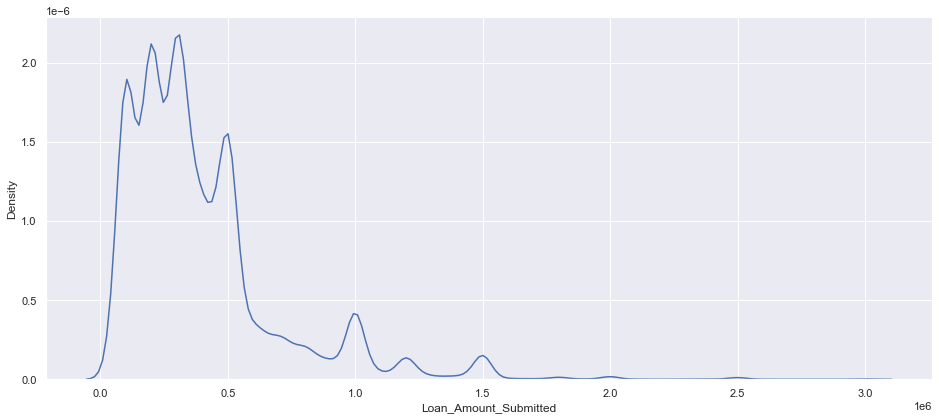

In [53]:
#Kernel density estimation - KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.set()
sns.displot(data=df['Loan_Amount_Submitted'], kind="kde", height=6, aspect=18.2/8.27)

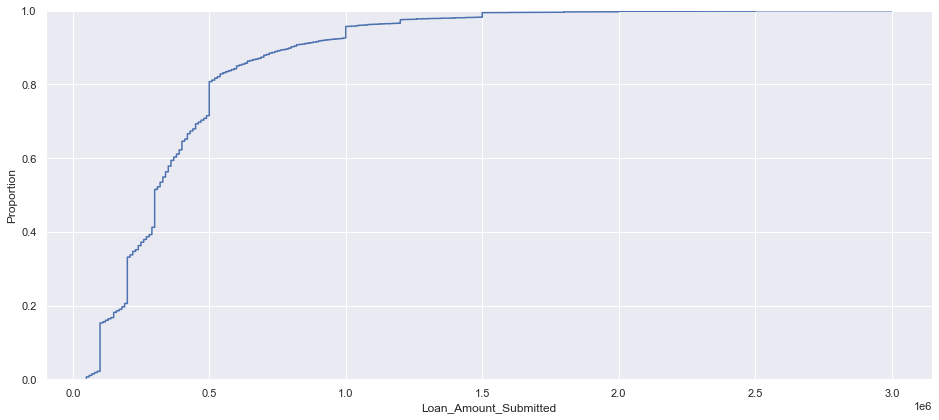

In [54]:
#Empirical cumulative distribution - This plot draws a monotonically-increasing curve through each datapoint such that 
#the height of the curve reflects the proportion of observations with a smaller value
sns.set()
sns.displot(data=df['Loan_Amount_Submitted'], kind="ecdf", height=6, aspect=18.2/8.27)


In [55]:
df['Loan_Amount_Submitted'].isna().sum()

34613

In [56]:
#For Loan Amount Submitted skewness detected. Due to the fact, that for this attribute we have a lot of missing values,
#new variable has been created. This new feature will determine whether the value is missing or not.

In [57]:
df['Loan_Amount_Submitted_nan'] = df['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
df.drop('Loan_Amount_Submitted',axis=1,inplace=True)

In [58]:
#As there is corresponding attribute i.e. Loan_Tenure_Submitted the same logic should be applied (e.g. we see the same number of nulls)

In [59]:
df['Loan_Tenure_Submitted'].isna().sum()

34613

In [60]:
df['Loan_Tenure_Submitted_nan'] = df['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
df.drop('Loan_Tenure_Submitted',axis=1,inplace=True)

### EMI Loan Submitted, Interest Rate, Processing Fee attribute analysis

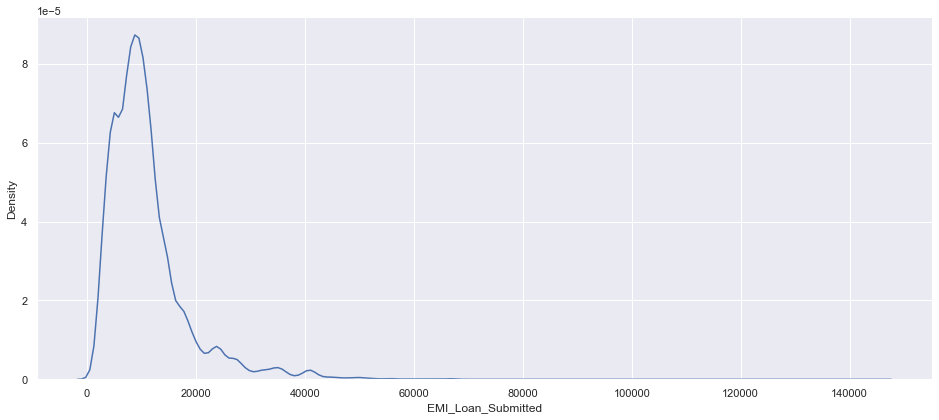

In [61]:
#check for skewness for one the attrbiutes - EMI Loan Submitted
sns.set()
sns.displot(data=df['EMI_Loan_Submitted'], kind="kde", height=6, aspect=18.2/8.27)

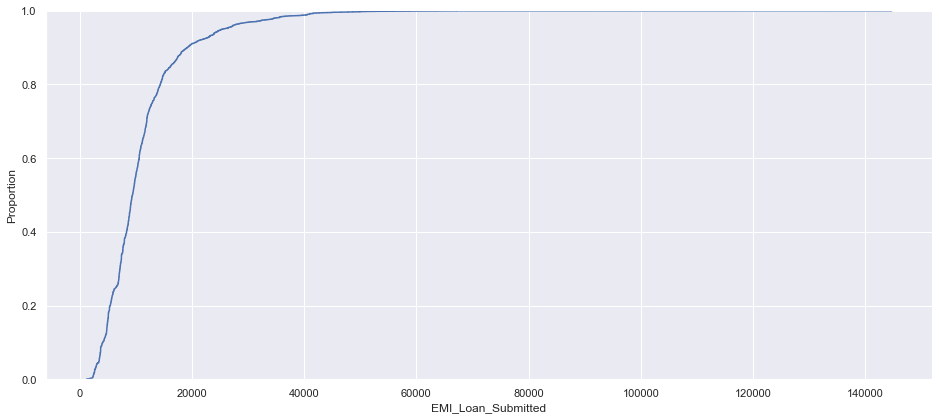

In [62]:
#Empirical cumulative distribution - This plot draws a monotonically-increasing curve through each datapoint such that 
#the height of the curve reflects the proportion of observations with a smaller value
sns.set()
sns.displot(data=df['EMI_Loan_Submitted'], kind="ecdf", height=6, aspect=18.2/8.27)

In [63]:
#Majority of the values for this feature are missing
df['EMI_Loan_Submitted'].isna().sum()

59294

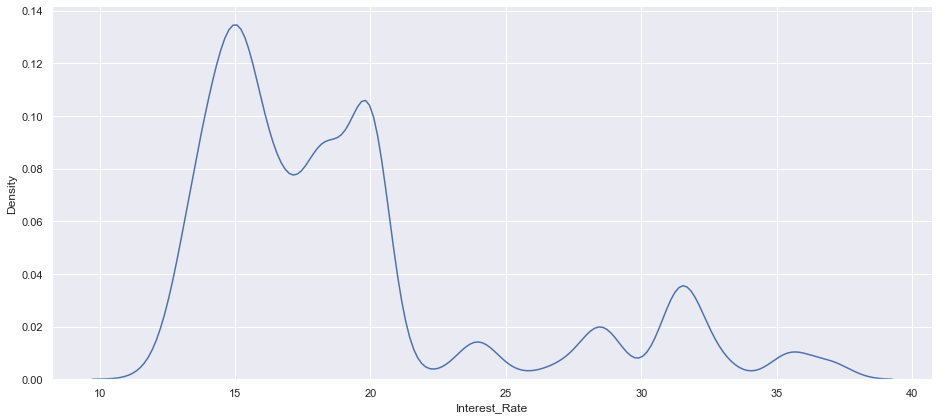

In [64]:
#Interest rate is not as signifcantly skewed as EMI_Loan_Submitted
sns.set()
sns.displot(data=df['Interest_Rate'], kind="kde", height=6, aspect=18.2/8.27)

In [65]:
df['Interest_Rate'].isna().sum()

59294

In [66]:
df['Processing_Fee'].isna().sum()

59600

In [67]:
#It seems that EMI_Loan_Submitted, Interest_Rate, Processing_Fee are three correlated attributes - from business perspective 
#Due to very high share of missing values, for each of them new attribute determining whether the value is missing or not has been created

In [68]:
df['Processing_Fee_nan'] = df['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
df['Interest_Rate_nan'] = df['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
df['EMI_Loan_Submitted_nan'] = df['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

<AxesSubplot:>

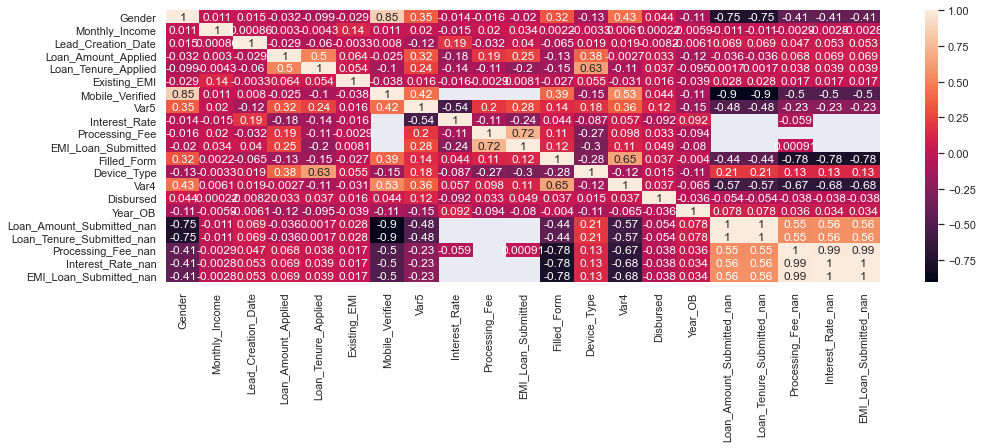

In [69]:
#Correlation coefficients
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True)

In [70]:
df.drop(['Processing_Fee','Interest_Rate','EMI_Loan_Submitted'],axis=1,inplace=True)

In [71]:
#Correlation coefficients supports the assumption that the 3 attributes are correlated, to limit the number of features, 
#Processing_Fee_nan and Interest_Rate_nan will be dropped (as they not provide additional information comparing to EMI_Loan_Submitted_nan)
#What is more, Loan_Tenure_Submitted_nan and Loan_Amount_Submitted_nan are also perfectly correlated - to limit
#the number of features Loan_Tenure_Submitted_nan will be dropped. 
df.drop(['Processing_Fee_nan','Interest_Rate_nan', 'Loan_Tenure_Submitted_nan'],axis=1,inplace=True)

<AxesSubplot:>

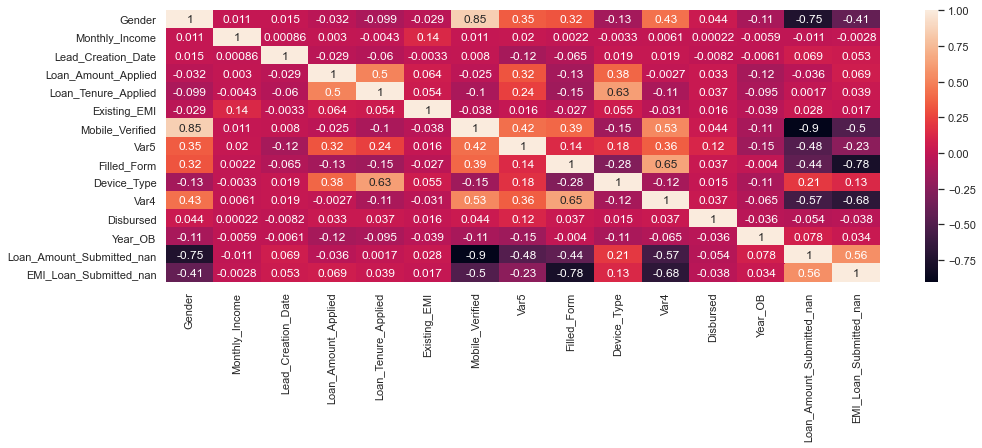

In [72]:
#Correlation coefficients
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True)

### Loan Amount applied, Loan Tenure applied attribute analysis

In [73]:
#Low number of missing values for Loan_Amount_Applied attribute
df['Loan_Amount_Applied'].isna().sum()

71

In [74]:
#Low number of missing values for Loan_Tenure_Applied attribute
df['Loan_Tenure_Applied'].isna().sum()

71

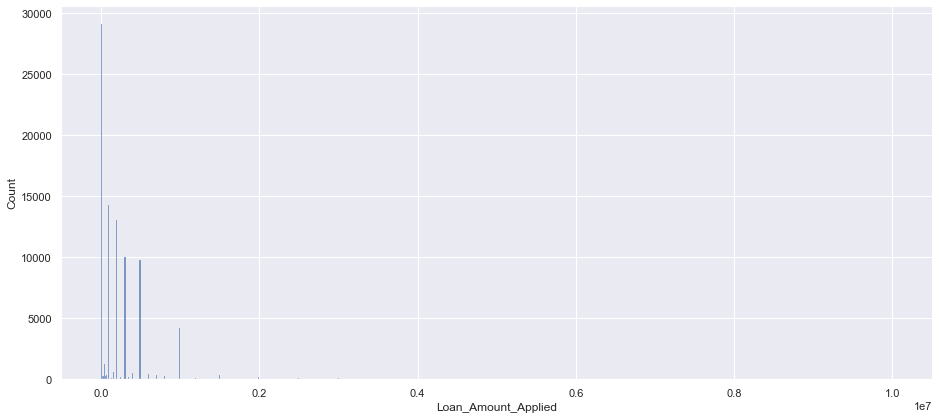

In [75]:
#check for skewness for Loan_Amount_Applied
sns.set()
sns.displot(data=df['Loan_Amount_Applied'], height=6, aspect=18.2/8.27)

In [76]:
#quite significant concentration of Loan_Amount_Applied with value 0 (no amount applied)
df.Loan_Amount_Applied.value_counts(normalize=True)

0.0          0.331838
100000.0     0.164591
200000.0     0.150180
300000.0     0.114952
500000.0     0.112273
               ...   
33000.0      0.000012
8500.0       0.000012
400.0        0.000012
94583.0      0.000012
4800000.0    0.000012
Name: Loan_Amount_Applied, Length: 277, dtype: float64

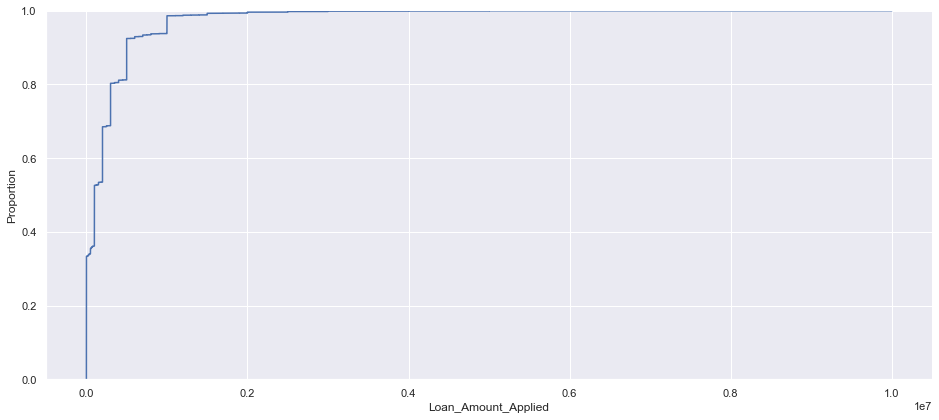

In [77]:
#Check cumulative distribution of Loan_Amount_Applied
sns.set()
sns.displot(data=df['Loan_Amount_Applied'], kind="ecdf", height=6, aspect=18.2/8.27)

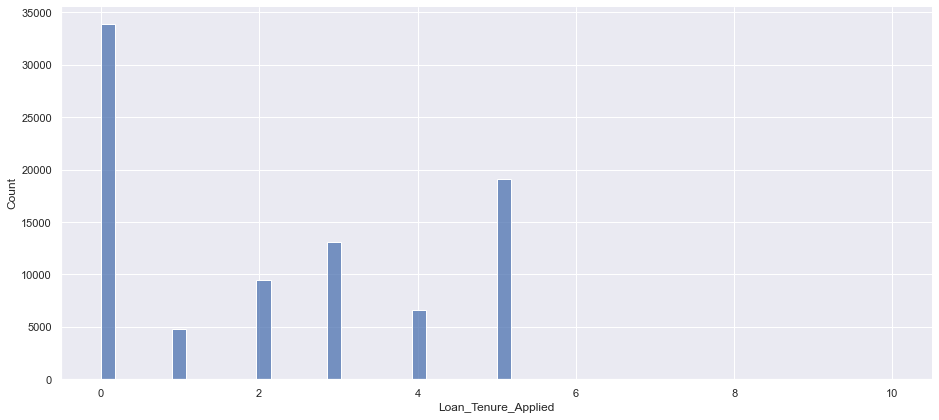

In [78]:
#check for skewness for Loan_Tenure_Applied
sns.set()
sns.displot(data=df['Loan_Tenure_Applied'], height=6, aspect=18.2/8.27)

In [79]:
#quite significant concentration of loan tenure applied with value 0 (no tenure)
df.Loan_Tenure_Applied.value_counts(normalize=True)

0.0     0.389240
5.0     0.219473
3.0     0.150433
2.0     0.108834
4.0     0.076137
1.0     0.055343
10.0    0.000460
7.0     0.000035
6.0     0.000023
8.0     0.000012
9.0     0.000012
Name: Loan_Tenure_Applied, dtype: float64

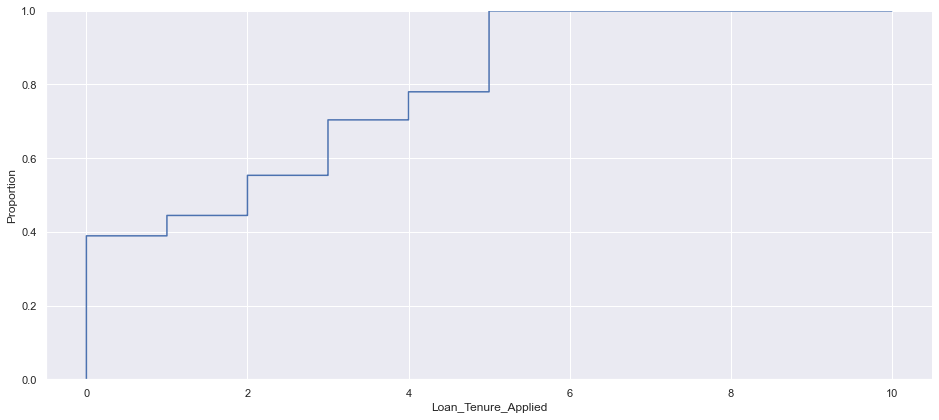

In [80]:
#Check cumulative distribution of Loan_Tenure_Applied
sns.set()
sns.displot(data=df['Loan_Tenure_Applied'], kind="ecdf", height=6, aspect=18.2/8.27)

In [81]:
#quite significant concentration of loan tenure/amount applied with one, particular value, i.e. 0 (no tenure/amount) 
#thus mode has been selected
df['Loan_Amount_Applied'].fillna(df['Loan_Amount_Applied'].mode()[0], inplace=True)
df['Loan_Tenure_Applied'].fillna(df['Loan_Tenure_Applied'].mode()[0], inplace=True)

### Existing EMI - analysis

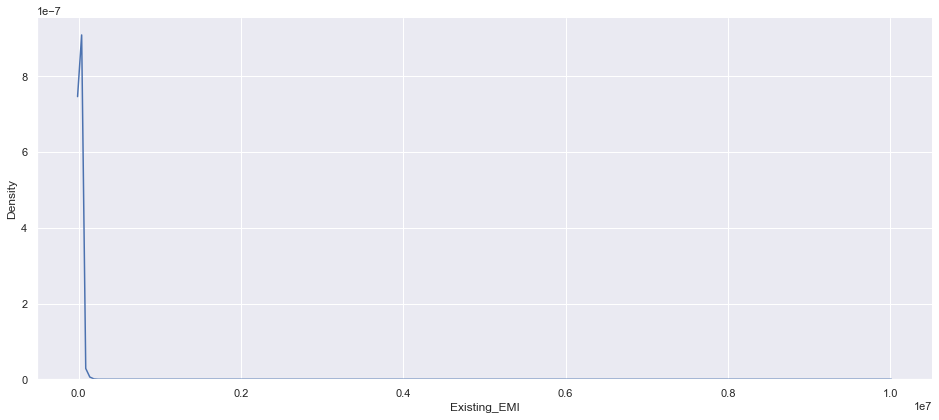

In [82]:
#check for skewness for Existing_EMI
sns.set()
sns.displot(data=df['Existing_EMI'], kind="kde", height=6, aspect=18.2/8.27)

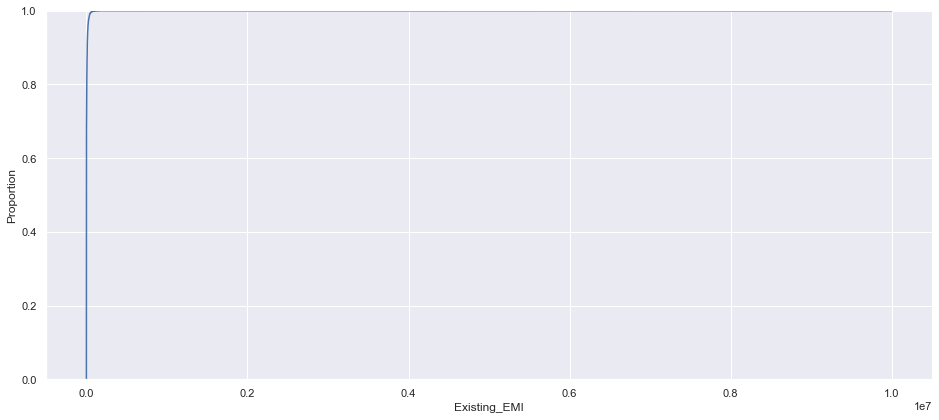

In [83]:
# Existing_EMI seems to be highly skewed
sns.set()
sns.displot(data=df['Existing_EMI'], kind="ecdf", height=6, aspect=18.2/8.27)

In [84]:
#About 2/3 of Existing_EMI is equal to 0
df.Existing_EMI.value_counts(normalize=True)

0.0         0.669795
5000.0      0.030995
10000.0     0.019977
3000.0      0.018183
4000.0      0.014100
              ...   
7861.0      0.000012
185000.0    0.000012
4542.0      0.000012
11615.0     0.000012
8839.0      0.000012
Name: Existing_EMI, Length: 3753, dtype: float64

In [85]:
df.Existing_EMI.agg([min, max])

min           0.0
max    10000000.0
Name: Existing_EMI, dtype: float64

In [86]:
# Low number of missing values for Existing_EMI attribute
df['Existing_EMI'].isna().sum()

71

In [87]:
# Missing values will be filled in with mode (0)
df['Existing_EMI'].fillna(df['Existing_EMI'].mode()[0], inplace=True)

In [88]:
# Final look on the data
df.head()

,Gender,City,Monthly_Income,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Year_OB,Loan_Amount_Submitted_nan,EMI_Loan_Submitted_nan
0,0,Delhi,20000,735733,300000.0,5.0,0.0,Other,HDFC Bank,0,0,HBXX,0,1,G,S122,1,0,722085,1,1
1,1,Mumbai,35000,735722,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,1,13,HBXA,0,1,G,S122,3,0,724642,0,0
2,1,Other,22500,735737,600000.0,4.0,0.0,Other,State Bank of India,1,0,HBXX,0,1,B,S143,1,0,723181,0,1
3,1,Other,35000,735727,1000000.0,5.0,0.0,Other,State Bank of India,1,10,HBXX,0,1,B,S143,3,0,725372,0,1
4,1,Bengaluru,100000,735738,500000.0,2.0,25000.0,Other,HDFC Bank,1,17,HBXX,0,1,B,S134,3,0,724276,0,1


In [89]:
# final check - count how many null values we have - check if any

for i in range(df.shape[1]):
    column = df.columns.values[i]
    n_miss = df.isnull().sum()[i]
    perc = n_miss / df.shape[0] * 100
    print('> %d, %s, Missing: %d (%.1f%%)' % (i, column, n_miss, perc))

> 0, Gender, Missing: 0 (0.0%)
> 1, City, Missing: 0 (0.0%)
> 2, Monthly_Income, Missing: 0 (0.0%)
> 3, Lead_Creation_Date, Missing: 0 (0.0%)
> 4, Loan_Amount_Applied, Missing: 0 (0.0%)
> 5, Loan_Tenure_Applied, Missing: 0 (0.0%)
> 6, Existing_EMI, Missing: 0 (0.0%)
> 7, Employer_Name, Missing: 0 (0.0%)
> 8, Salary_Account, Missing: 0 (0.0%)
> 9, Mobile_Verified, Missing: 0 (0.0%)
> 10, Var5, Missing: 0 (0.0%)
> 11, Var1, Missing: 0 (0.0%)
> 12, Filled_Form, Missing: 0 (0.0%)
> 13, Device_Type, Missing: 0 (0.0%)
> 14, Var2, Missing: 0 (0.0%)
> 15, Source, Missing: 0 (0.0%)
> 16, Var4, Missing: 0 (0.0%)
> 17, Disbursed, Missing: 0 (0.0%)
> 18, Year_OB, Missing: 0 (0.0%)
> 19, Loan_Amount_Submitted_nan, Missing: 0 (0.0%)
> 20, EMI_Loan_Submitted_nan, Missing: 0 (0.0%)


In [90]:
#Unbalanced dataset - there will be a need to handle imbalanced dataset - included in pipelines (RandomOverSampler)

df['Disbursed'].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

In [91]:
# determine Y - target value
y = df['Disbursed']

In [92]:
X = df.drop('Disbursed', axis=1)

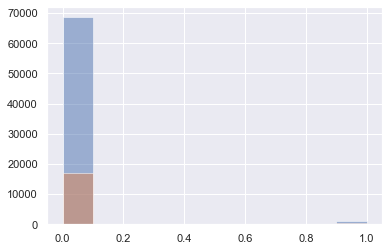

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [94]:
print("train")
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==1])/len(y_train[y_train==0]))
print()
print("test")
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))
print(len(y_test[y_test==1])/len(y_test[y_test==0]))
print()

train
68612
1004
0.014633008803124818

test
17135
269
0.01569886197840677



In [95]:
from sklearn.base import BaseEstimator, TransformerMixin
# a class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [96]:
# pipeline for numerical attributes
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Gender","Monthly_Income", "Lead_Creation_Date", "Loan_Amount_Applied", "Loan_Tenure_Applied", "Existing_EMI", "Mobile_Verified", "Var5", "Filled_Form", "Device_Type","Var4", "Year_OB", "Loan_Amount_Submitted_nan", "EMI_Loan_Submitted_nan"])),
         ('standardscaler', StandardScaler())
    ])


In [97]:
num_pipeline.fit_transform(X_train)

array([[ 0.86294522, -0.01770157, -0.77591527, ...,  0.40629596,
        -0.81253417, -1.46557452],
       [ 0.86294522, -0.01896725,  1.30548172, ...,  0.26672556,
        -0.81253417, -1.46557452],
       [-1.15882211, -0.01369361, -0.40423723, ...,  0.96495995,
        -0.81253417, -1.46557452],
       ...,
       [ 0.86294522, -0.01474833, -0.069727  , ...,  0.96495995,
        -0.81253417,  0.68232628],
       [ 0.86294522, -0.0164359 , -0.96175428, ...,  0.40629596,
        -0.81253417,  0.68232628],
       [-1.15882211, -0.01479052,  1.37981732, ...,  0.12715516,
         1.23071748,  0.68232628]])

In [98]:
# a class for categorical features imputaion - for testing purposes only
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [99]:
# pipeline for categorical features
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["City", "Employer_Name", "Salary_Account", "Var1","Var2", "Source"])),
        ("cat_encoder", ce.BinaryEncoder()),
        ('standardscaler', StandardScaler())
    ])

In [100]:
cat_pipeline.fit_transform(X_train)

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[ 0.        , -0.44987822, -1.04635001, ..., -0.43144453,
        -1.05622063,  1.06281744],
       [ 0.        , -0.44987822, -1.04635001, ..., -0.43144453,
         0.94677189, -0.94089536],
       [ 0.        , -0.44987822, -1.04635001, ..., -0.43144453,
         0.94677189,  1.06281744],
       ...,
       [ 0.        , -0.44987822,  0.95570315, ..., -0.43144453,
         0.94677189, -0.94089536],
       [ 0.        , -0.44987822, -1.04635001, ..., -0.43144453,
        -1.05622063, -0.94089536],
       [ 0.        ,  2.22282378, -1.04635001, ..., -0.43144453,
         0.94677189, -0.94089536]])

In [101]:
# combined pipeline
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### Section for training models

In [102]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [103]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline

pipe = Pipeline([('preprocessing', preprocess_pipeline), ('sampling', RandomOverSampler(sampling_strategy='minority')), 
                  ('standardscaler', StandardScaler()), 
                 ('classifier', LinearSVC(C=1))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'recall', return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed 

{'classifier__C': 1}

In [104]:
from sklearn.linear_model import LogisticRegression

pipe_2 = Pipeline([('preprocessing', preprocess_pipeline),  ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('standardscaler', StandardScaler()), 
                   ('classifier', LogisticRegression(C=1, solver='newton-cg'))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, scoring = 'recall', return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__C': 100}

In [105]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', preprocess_pipeline),  ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, scoring = 'recall', return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 3,
 'classifier__min_samples_split': 2}

In [106]:
from sklearn.ensemble import BaggingClassifier

pipe_5 = Pipeline([('preprocessing', preprocess_pipeline),  ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100, 500],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, scoring = 'recall', return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_


C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__max_samples': 20, 'classifier__n_estimators': 50}

In [107]:
from sklearn.ensemble import RandomForestClassifier

pipe_6 = Pipeline([('preprocessing', preprocess_pipeline), ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('standardscaler', StandardScaler()),
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_6 = {'classifier__n_estimators': [5, 10, 50, 80],
              'classifier__max_leaf_nodes': [5, 10, 20],
              'classifier__max_depth': [5, 10, 15]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, scoring = 'recall', return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 10,
 'classifier__n_estimators': 10}

In [108]:
from sklearn.ensemble import ExtraTreesClassifier

pipe_7 = Pipeline([('preprocessing', preprocess_pipeline), ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, scoring = 'recall', return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_8 = Pipeline([('preprocessing', preprocess_pipeline), ('sampling', RandomOverSampler(sampling_strategy='minority')),
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [10, 20, 50],
              'classifier__learning_rate': [0.01, 0.1,0.5]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, scoring = 'recall',return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}

In [110]:

from imblearn.pipeline import Pipeline
import xgboost

pipe_9 = Pipeline([('preprocessing', preprocess_pipeline), ('sampling', RandomOverSampler(sampling_strategy='minority')), 
                    ('standardscaler', StandardScaler()),
                   ('classifier', xgboost.XGBClassifier(n_estimators=700, 
                      learning_rate=0.05, 
                      random_state=42))
                  ])


param_grid_9 = { 'classifier__n_estimators': [200, 400, 700],
              'classifier__learning_rate': [0.05, 0.1, 0.2],
                 'classifier__max_depth': [3,4,5]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, scoring = 'recall', return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 200}

In [111]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
                ('grid_4', grid_4.best_estimator_), 
                ('grid_6', grid_6.best_estimator_), 
                ('grid_7', grid_7.best_estimator_),
                ('grid_8', grid_8.best_estimator_),
               ],
    voting='soft')
voting_clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


VotingClassifier(estimators=[('grid_4',
                              Pipeline(steps=[('preprocessing',
                                               FeatureUnion(transformer_list=[('num_pipeline',
                                                                               Pipeline(steps=[('select_numeric',
                                                                                                DataFrameSelector(attribute_names=['Gender',
                                                                                                                                   'Monthly_Income',
                                                                                                                                   'Lead_Creation_Date',
                                                                                                                                   'Loan_Amount_Applied',
                                                                                          

In [112]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))
models.append(('LR', grid_2.best_estimator_))
models.append(('DecisionTreeClassifier', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('RandomForestClassifier', grid_6.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GrBoos', grid_8.best_estimator_))
models.append(('voting_clf', voting_clf))
models.append(('XGB', grid_9.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))            
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

SVM linear
precision_score: 0.042027455121436116
recall_score: 0.7397769516728625
f1_score: 0.07953637090327738
accuracy_score: 0.7353481958170536
roc_auc_score: 0.8058692018228305
LR
precision_score: 0.042444821731748725
recall_score: 0.7434944237918215
f1_score: 0.08030515960650472
accuracy_score: 0.7367846472075384
roc_auc_score: 0.8056819722670288
DecisionTreeClassifier
precision_score: 0.031103991456414366
recall_score: 0.8661710037174721
f1_score: 0.06005154639175258
accuracy_score: 0.5809009423121122
roc_auc_score: 0.7422645230365033
BaggingClassifier
precision_score: 0.03733516013015927
recall_score: 0.8104089219330854
f1_score: 0.07138179436804191
accuracy_score: 0.6740979085267754
roc_auc_score: 0.7993684527961313
RandomForestClassifier
precision_score: 0.03629096722621902
recall_score: 0.8438661710037175
f1_score: 0.06958920907418761
accuracy_score: 0.6512296023902551
roc_auc_score: 0.806318834794324
ExtraTrees
precision_score: 0.036757775683317624
recall_score: 0.7249070631

### Table with results

In [114]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear','LR','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTrees','GrBoos','voting_clf','XGB'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM linear,0.042027,0.739777,0.079536,0.735348,0.805869
1,LR,0.042445,0.743494,0.080305,0.736785,0.805682
2,DecisionTreeClassifier,0.031104,0.866171,0.060052,0.580901,0.742265
3,BaggingClassifier,0.037335,0.810409,0.071382,0.674098,0.799368
4,RandomForestClassifier,0.036291,0.843866,0.069589,0.651230,0.806319
5,ExtraTrees,0.036758,0.724907,0.069968,0.702137,0.786907
6,GrBoos,0.036740,0.817844,0.070321,0.665766,0.807639
7,voting_clf,0.034524,0.851301,0.066358,0.629740,0.811875
8,XGB,0.044509,0.802974,0.084342,0.730522,0.841592


At the beginning very decent results of accuracy score were achieved.However it is misleading since we have unbalanced dataset. Basically it is easy for the model to predict negative values (0 - as most of the target values are 0), but we are interested in the positive class. And this one should be appropriately predicted. We are not focused on maximizing the total number of correct predictions in general, but to appropriately identify clients who received a credit. 

The decision to choose recall as a scoring target has been made - with acceptance of low precision (trade-off i.e. maximizing f1 score provided insatisfactory results). The highest recall scorehas been achieved by Decision Trees Classifier. However with the lowest precision (trade-off) and auc curve score. Overall quite good recall and AUC for XGB classifier. 

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

It is calculated as the number of true positives divided by the total number of true positives and false negatives (e.g. it is the true positive rate).

Recall = TruePositives / (TruePositives + FalseNegatives)

SVM linear
LR
DecisionTreeClassifier
BaggingClassifier
RandomForestClassifier
ExtraTrees
GrBoos
voting_clf
XGB


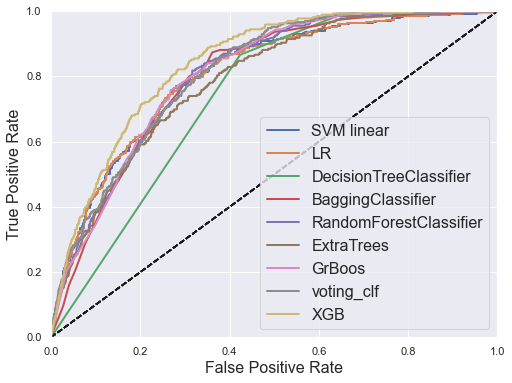

In [115]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    elif (name == 'Vo hard'):
        pass
    else:
        y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)
plt.legend(loc="lower right", fontsize=16)
plt.show()